<Axes: >

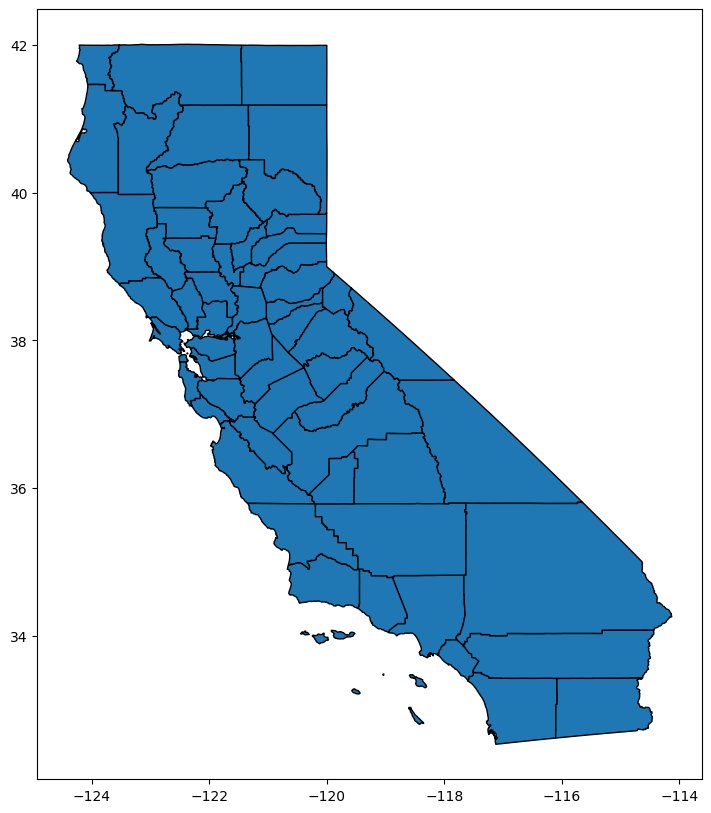

In [1]:
import geopandas as gpd

# Example: Use a public GeoJSON of California counties
url = "https://raw.githubusercontent.com/codeforgermany/click_that_hood/master/public/data/california-counties.geojson"
gdf = gpd.read_file(url)
gdf.plot(edgecolor="black", figsize=(10, 10))


In [2]:
gdf.head()

,name,cartodb_id,created_at,updated_at,geometry
0,Alameda,1,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"MULTIPOLYGON (((-122.31293 37.89733, -122.2884..."
1,Alpine,2,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-120.07239 38.70277, -119.96495 38.7..."
2,Amador,3,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-121.02726 38.48925, -121.02741 38.5..."
3,Butte,4,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-121.87925 39.30361, -121.90831 39.3..."
4,Calaveras,5,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-120.87605 38.02889, -120.91875 38.0..."


In [3]:
import pandas as pd
# ACS dataset (already local or from previous step)
df = pd.read_csv("acs2017_county_data.csv")


In [17]:
df.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [4]:
df[df['State'] == 'California']['County'].head()

186      Alameda County
187       Alpine County
188       Amador County
189        Butte County
190    Calaveras County
Name: County, dtype: object

In [5]:
df_ca = df[df['State'] == 'California'].copy()
df_ca['County_clean'] = df_ca['County'].str.replace(' County', '', regex=False)

In [7]:
# Ensure geometry column is present and preserved
gdf_merged = gdf.merge(df_ca, left_on='name', right_on='County_clean')


In [11]:
gdf_merged["TotalPop"].describe()

count    5.800000e+01
mean     6.721181e+05
std      1.468372e+06
min      1.203000e+03
25%      4.726750e+04
50%      1.824860e+05
75%      6.770358e+05
max      1.010572e+07
Name: TotalPop, dtype: float64

In [12]:
print(gdf_merged[["name", "TotalPop", "Income", "geometry"]].head())

        name  TotalPop  Income  \
0    Alameda   1629615   85743   
1     Alpine      1203   63438   
2     Amador     37306   60636   
3      Butte    225207   46516   
4  Calaveras     45057   54800   

                                            geometry  
0  MULTIPOLYGON (((-122.31293 37.89733, -122.2884...  
1  POLYGON ((-120.07239 38.70277, -119.96495 38.7...  
2  POLYGON ((-121.02726 38.48925, -121.02741 38.5...  
3  POLYGON ((-121.87925 39.30361, -121.90831 39.3...  
4  POLYGON ((-120.87605 38.02889, -120.91875 38.0...  


<Axes: >

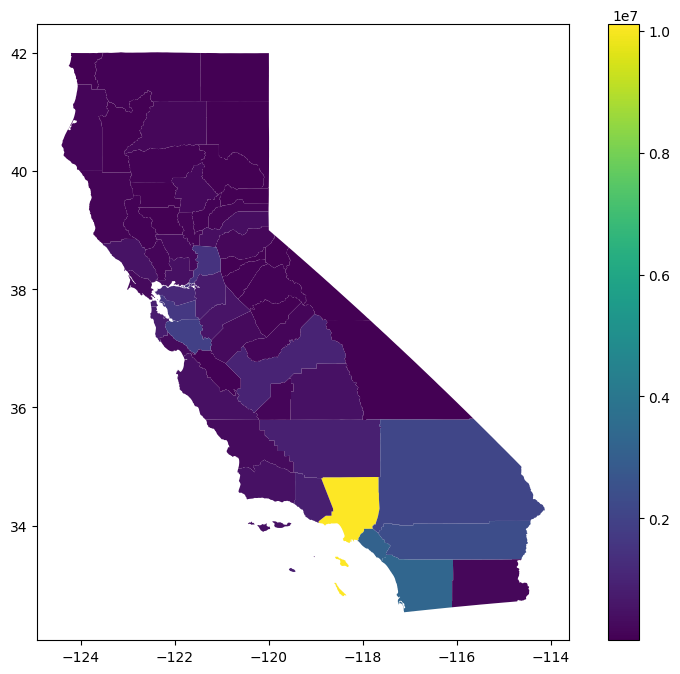

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

gdf_merged.plot(column='TotalPop', cmap='viridis', legend=True, figsize=(10, 8))

In [13]:
from libpysal.weights import Queen

w = Queen.from_dataframe(gdf_merged, use_index=False)
print(w.full()[0])  # Sparse adjacency matrix


[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
w.neighbors  # Dictionary: {region_id: [neighbor_ids]}

{0: [32, 56, 6, 39],
 1: [2, 4, 8, 9, 45],
 2: [1, 4, 53, 56, 9],
 3: [33, 34, 51, 5, 42, 11],
 4: [32, 1, 2, 8, 56],
 5: [33, 3, 41, 11, 14],
 6: [0, 56],
 7: [18, 12],
 8: [32, 1, 4, 22, 24, 45],
 9: [1, 2, 50, 53],
 10: [44, 13, 45, 46, 22, 54, 26, 28],
 11: [34, 3, 5, 25, 14],
 12: [25, 18, 35, 7],
 13: [36, 55, 10, 28, 45],
 14: [20, 5, 41, 11, 25, 47],
 15: [49, 52, 29],
 16: [37],
 17: [48, 43, 42, 51],
 18: [35, 7, 27, 12, 31],
 19: [41, 20, 53, 47],
 20: [19, 23, 25, 14, 47],
 21: [40, 49, 36, 55],
 22: [26, 8, 24, 10, 45],
 23: [20],
 24: [32, 8, 26, 22],
 25: [34, 35, 20, 11, 12, 14],
 26: [32, 22, 39, 54, 24, 10],
 27: [18, 43],
 28: [10, 36, 13, 44],
 29: [52, 15],
 30: [46, 37, 54, 39],
 31: [18, 51, 34, 35, 43],
 32: [0, 26, 4, 39, 8, 24, 56],
 33: [50, 3, 5, 53, 41, 42],
 34: [51, 3, 35, 25, 11, 31],
 35: [18, 34, 25, 12, 31],
 36: [28, 21, 55, 40, 57, 44, 13],
 37: [16, 30, 39],
 38: [40, 57],
 39: [0, 32, 37, 54, 26, 30],
 40: [36, 21, 38],
 41: [33, 19, 5, 53, 14, 47

In [16]:
from esda.moran import Moran

income = gdf_merged["Income"].values
moran_income = Moran(income, w)

print("Moran’s I:", moran_income.I)
print("p-value:", moran_income.p_sim)

Moran’s I: 0.5463801664360989
p-value: 0.001


# Races, Incomes and  GIS

In [19]:
gdf_merged["income_white_ratio"] = gdf_merged["Income"] * (gdf_merged["White"] / 100)

In [20]:
gdf_merged.head()

,name,cartodb_id,created_at,updated_at,geometry,CountyId,State,County,TotalPop,Men,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,County_clean,income_white_ratio
0,Alameda,1,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"MULTIPOLYGON (((-122.31293 37.89733, -122.2884...",6001,California,Alameda County,1629615,799649,...,6.0,32.5,826310,79.3,13.2,7.3,0.1,6.0,Alameda,27609.246
1,Alpine,2,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-120.07239 38.70277, -119.96495 38.7...",6003,California,Alpine County,1203,664,...,14.0,21.9,374,58.6,30.2,11.2,0.0,14.6,Alpine,40980.948
2,Amador,3,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-121.02726 38.48925, -121.02741 38.5...",6005,California,Amador County,37306,20005,...,6.4,32.0,13444,63.9,21.0,14.7,0.4,9.3,Amador,48084.348
3,Butte,4,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-121.87925 39.30361, -121.90831 39.3...",6007,California,Butte County,225207,111587,...,5.7,20.1,93439,72.8,17.2,9.7,0.4,9.1,Butte,33910.164
4,Calaveras,5,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-120.87605 38.02889, -120.91875 38.0...",6009,California,Calaveras County,45057,22292,...,8.3,35.5,16721,67.6,18.2,13.7,0.4,7.1,Calaveras,44936.000


In [68]:
max(gdf_merged["White"])

87.0

In [21]:
gdf_merged["income_black_ratio"] = gdf_merged["Income"] * (gdf_merged["Black"] / 100)
gdf_merged["income_hispanic_ratio"] = gdf_merged["Income"] * (gdf_merged["Hispanic"] / 100)
gdf_merged["income_asian_ratio"] = gdf_merged["Income"] * (gdf_merged["Asian"] / 100)

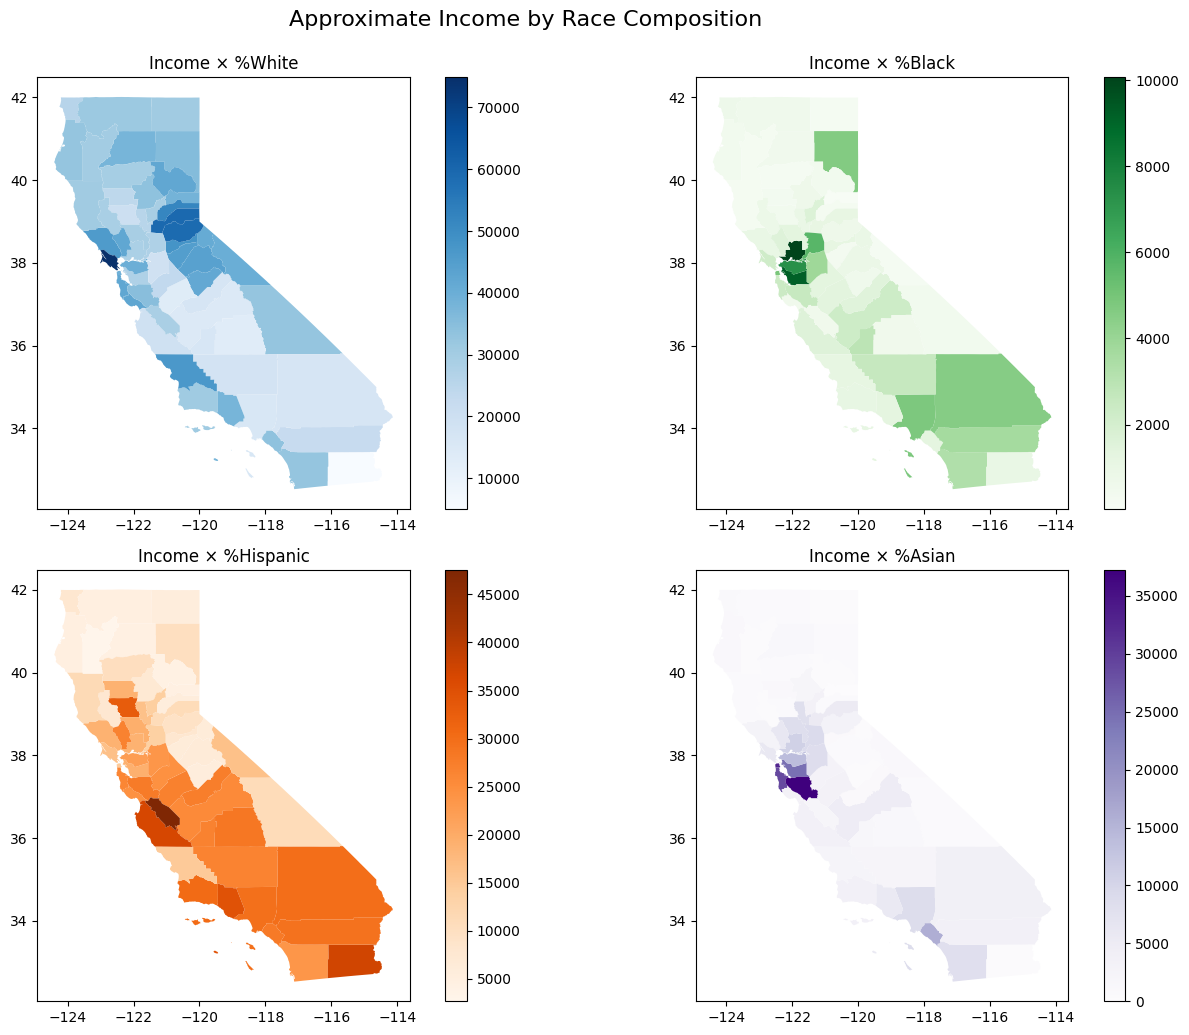

In [28]:
import matplotlib.pyplot as plt

# Step 1: Create the grid (2 rows, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Step 2: Plot each variable into its place
gdf_merged.plot(column="income_white_ratio", cmap="Blues", legend=True, ax=axes[0, 0])
axes[0, 0].set_title("Income × %White")

gdf_merged.plot(column="income_black_ratio", cmap="Greens", legend=True, ax=axes[0, 1])
axes[0, 1].set_title("Income × %Black")

gdf_merged.plot(column="income_hispanic_ratio", cmap="Oranges", legend=True, ax=axes[1, 0])
axes[1, 0].set_title("Income × %Hispanic")

gdf_merged.plot(column="income_asian_ratio", cmap="Purples", legend=True, ax=axes[1, 1])
axes[1, 1].set_title("Income × %Asian")

# Step 3: Layout adjustment
plt.tight_layout()
plt.suptitle("Approximate Income by Race Composition", fontsize=16, y=1.03)
plt.show()



Text(0.5, 1.0, 'Dominant Race by Income Contribution per County')

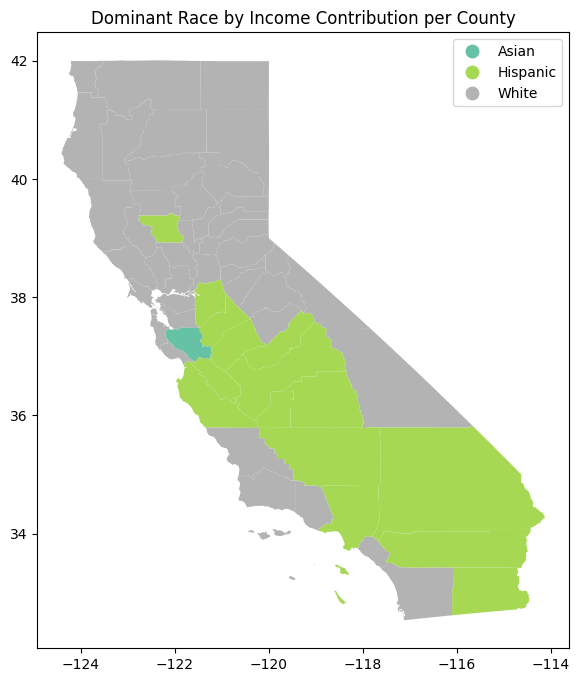

In [37]:
# Step 1: Create a new column with the dominant group
race_income_cols = ["income_white_ratio", "income_black_ratio", "income_hispanic_ratio", "income_asian_ratio"]

# This gives the column name with the highest value per row
gdf_merged["dominant_race_income"] = gdf_merged[race_income_cols].idxmax(axis=1)

# Clean labels (optional)
gdf_merged["dominant_race_income"] = gdf_merged["dominant_race_income"].str.replace("income_", "").str.replace("_ratio", "").str.title()



# Step 2: Plot
gdf_merged.plot(column="dominant_race_income", cmap="Set2", legend=True, figsize=(10, 8))
plt.title("Dominant Race by Income Contribution per County")



In [32]:
gdf_merged["dominant_race_income"][:10]

0       White
1       White
2       White
3       White
4       White
5    Hispanic
6       White
7       White
8       White
9       White
Name: dominant_race_income, dtype: object

In [30]:
gdf_merged["dominant_race_income"].value_counts()

dominant_race_income
White       42
Hispanic    15
Asian        1
Name: count, dtype: int64

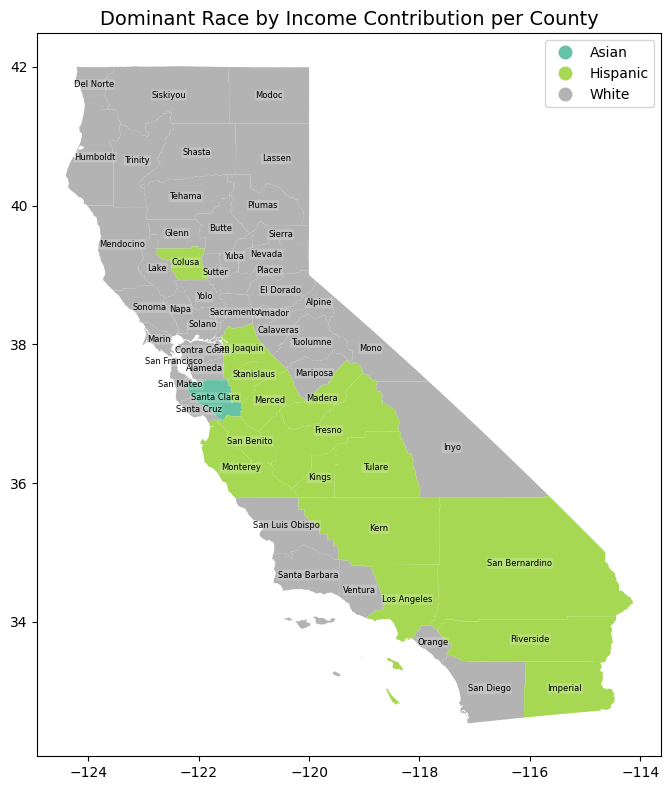

In [43]:
import matplotlib.pyplot as plt

# 1. Plot the dominant group map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_merged.plot(column="dominant_race_income", cmap="Set2", legend=True, ax=ax)

# 2. Set title
ax.set_title("Dominant Race by Income Contribution per County", fontsize=14)

# 3. Label each county at its centroid
for _, row in gdf_merged.iterrows():
    centroid = row.geometry.centroid
    name = row["County_clean"]

    ax.annotate(
        text=name,
        xy=(centroid.x, centroid.y),
        fontsize=6,
        ha="center",  # center horizontally
        va="center",   # center vertically (optional)
        bbox=dict(boxstyle="round,pad=0.1", fc="white", ec="none", alpha=0.2)
    )

# 4. Tidy layout
plt.tight_layout()
plt.show()



In [44]:
import folium
from folium.features import GeoJsonTooltip
from IPython.display import display

### Identify the problematic columns

In [47]:
#gdf_merged.dtypes

In [48]:
gdf_merged["created_at"] = gdf_merged["created_at"].astype(str)
gdf_merged["updated_at"] = gdf_merged["updated_at"].astype(str)

In [49]:
center = gdf_merged.geometry.centroid.unary_union.centroid
m = folium.Map(location=[center.y, center.x], zoom_start=6)

folium.GeoJson(
    gdf_merged,
    name="Dominant Race by Income",
    tooltip=GeoJsonTooltip(
        fields=["County_clean", "dominant_race_income"],
        aliases=["County", "Dominant Group"],
        sticky=True
    ),
    style_function=lambda feature: {
        'fillColor': {
            "White": "lightblue",
            "Hispanic": "orange",
            "Asian": "purple"
        }.get(feature["properties"]["dominant_race_income"], "gray"),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    }
).add_to(m)

C:\Users\Fernando\AppData\Local\Temp\ipykernel_1492\636727255.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = gdf_merged.geometry.centroid.unary_union.centroid
C:\Users\Fernando\AppData\Local\Temp\ipykernel_1492\636727255.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  center = gdf_merged.geometry.centroid.unary_union.centroid


In [50]:
# Add layer control (optional)
folium.LayerControl().add_to(m)

# Display in Jupyter
display(m)

# Alpha to get the incomes 

In [51]:
for group in ["white", "black", "hispanic", "asian"]:
    col = f"income_{group}_ratio"
    norm_col = f"{col}_norm"
    gdf_merged[norm_col] = gdf_merged[col] / gdf_merged[col].max()


In [53]:
gdf_merged.head(2)

,name,cartodb_id,created_at,updated_at,geometry,CountyId,State,County,TotalPop,Men,...,County_clean,income_white_ratio,income_black_ratio,income_hispanic_ratio,income_asian_ratio,dominant_race_income,income_white_ratio_norm,income_black_ratio_norm,income_hispanic_ratio_norm,income_asian_ratio_norm
0,Alameda,1,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"MULTIPOLYGON (((-122.31293 37.89733, -122.2884...",6001,California,Alameda County,1629615,799649,...,Alameda,27609.246,9174.501,19292.175,24608.241,White,0.368799,0.911335,0.405574,0.660454
1,Alpine,2,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-120.07239 38.70277, -119.96495 38.7...",6003,California,Alpine County,1203,664,...,Alpine,40980.948,951.570,6153.486,444.066,White,0.547415,0.094523,0.129363,0.011918


In [54]:
def get_rgba(group, strength):
    base_colors = {
        "White": (173, 216, 230),   # lightblue
        "Hispanic": (255, 165, 0),  # orange
        "Asian": (128, 0, 128),     # purple
    }
    r, g, b = base_colors.get(group, (150, 150, 150))  # fallback gray
    return f"rgba({r}, {g}, {b}, {strength:.2f})"


In [64]:
center = gdf_merged.geometry.centroid.union_all().centroid
m = folium.Map(location=[center.y, center.x], zoom_start=6)

folium.GeoJson(
    gdf_merged,
    name="Dominant + Income Strength",
    tooltip=GeoJsonTooltip(fields=["County_clean", "dominant_race_income"],
                          aliases=["County", "Dominant Group"],
        sticky=True),
    style_function=lambda feature: {
        "fillColor": get_rgba(
            feature["properties"]["dominant_race_income"],
            feature["properties"][f"income_{feature['properties']['dominant_race_income'].lower()}_ratio_norm"]
        ),
        "color": "black",
        "weight": 1,
        "fillOpacity": 1.0,
    }
).add_to(m)


C:\Users\Fernando\AppData\Local\Temp\ipykernel_1492\3941027796.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = gdf_merged.geometry.centroid.union_all().centroid


In [65]:
# Add layer control (optional)
folium.LayerControl().add_to(m)

# Display in Jupyter
display(m)

In [69]:
gdf_merged["max_income_contribution"] = gdf_merged[
    ["income_white_ratio", "income_black_ratio", "income_hispanic_ratio", "income_asian_ratio"]
].max(axis=1)

In [70]:
gdf_merged["max_income_contribution"] = gdf_merged["max_income_contribution"].round(0)


In [71]:
center = gdf_merged.geometry.centroid.union_all().centroid
m = folium.Map(location=[center.y, center.x], zoom_start=6)

folium.GeoJson(
    gdf_merged,
    name="Dominant + Income Strength",
    tooltip=GeoJsonTooltip(fields=["County_clean", "dominant_race_income", "max_income_contribution"],
                          aliases=["County", "Dominant Group", "Max Income Contribution"],
                           localize=True,  # adds comma separators for numbers
        sticky=True),
    style_function=lambda feature: {
        "fillColor": get_rgba(
            feature["properties"]["dominant_race_income"],
            feature["properties"][f"income_{feature['properties']['dominant_race_income'].lower()}_ratio_norm"]
        ),
        "color": "black",
        "weight": 1,
        "fillOpacity": 1.0,
    }
).add_to(m)

C:\Users\Fernando\AppData\Local\Temp\ipykernel_1492\2703689800.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = gdf_merged.geometry.centroid.union_all().centroid


In [72]:
# Add layer control (optional)
folium.LayerControl().add_to(m)

# Display in Jupyter
display(m)

In [73]:
gdf_merged.columns

Index(['name', 'cartodb_id', 'created_at', 'updated_at', 'geometry',
       'CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'County_clean',
       'income_white_ratio', 'income_black_ratio', 'income_hispanic_ratio',
       'income_asian_ratio', 'dominant_race_income', 'income_white_ratio_norm',
       'income_black_ratio_norm', 'income_hispanic_ratio_norm',
       'income_asian_ratio_norm', 'max_income_contribution'],
      dtype='object')

In [74]:
gdf_merged["max_income_contribution_norm"] = (
    gdf_merged["max_income_contribution"] / gdf_merged["max_income_contribution"].max()
)

In [75]:
def get_rgba(dominant_group, strength):
    base_colors = {
        "White": (173, 216, 230),    # light blue
        "Hispanic": (255, 165, 0),   # orange
        "Asian": (128, 0, 128),      # purple
        "Black": (60, 60, 60)        # optional in case you want to support later
    }
    r, g, b = base_colors.get(dominant_group, (150, 150, 150))
    return f"rgba({r}, {g}, {b}, {strength:.2f})"

In [77]:
center = gdf_merged.geometry.centroid.union_all().centroid
m = folium.Map(location=[center.y, center.x], zoom_start=6)

folium.GeoJson(
    gdf_merged,
    tooltip=GeoJsonTooltip(
        fields=["County_clean", "dominant_race_income", "max_income_contribution"],
        aliases=["County", "Dominant Group", "Max Contribution"],
        localize=True,
        sticky=True
    ),
    style_function=lambda feature: {
        'fillColor': get_rgba(
            feature["properties"]["dominant_race_income"],
            feature["properties"]["max_income_contribution_norm"]
        ),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 1.0  # must be 1.0 so RGBA opacity works
    }
).add_to(m)


C:\Users\Fernando\AppData\Local\Temp\ipykernel_1492\2827518300.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = gdf_merged.geometry.centroid.union_all().centroid


In [78]:
# Add layer control (optional)
folium.LayerControl().add_to(m)

# Display in Jupyter
display(m)

In [80]:
import folium
from folium.features import DivIcon

top5 = gdf_merged.nlargest(5, "max_income_contribution")


# Assuming 'm' is your existing folium.Map object
for _, row in top5.iterrows():
    centroid = row.geometry.centroid
    lat, lon = centroid.y, centroid.x
    county = row["County_clean"]
    value = row["max_income_contribution"]

    folium.Marker(
        location=[lat, lon],
        icon=DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size:10px; font-weight:bold; color:black; background-color:white; padding:2px; border-radius:3px;">{county}<br>${value:,.0f}</div>',
        )
    ).add_to(m)


In [81]:
# Add layer control (optional)
folium.LayerControl().add_to(m)

# Display in Jupyter
display(m)

In [82]:
from libpysal.weights import Queen

w = Queen.from_dataframe(gdf_merged, use_index=False)


In [83]:
from esda.moran import Moran_Local

y = gdf_merged["max_income_contribution"]
lisa = Moran_Local(y, w)


In [84]:
gdf_merged["lisa_cluster"] = lisa.q  # 1=HH, 2=LL, 3=HL, 4=LH
gdf_merged["lisa_significant"] = lisa.p_sim < 0.05


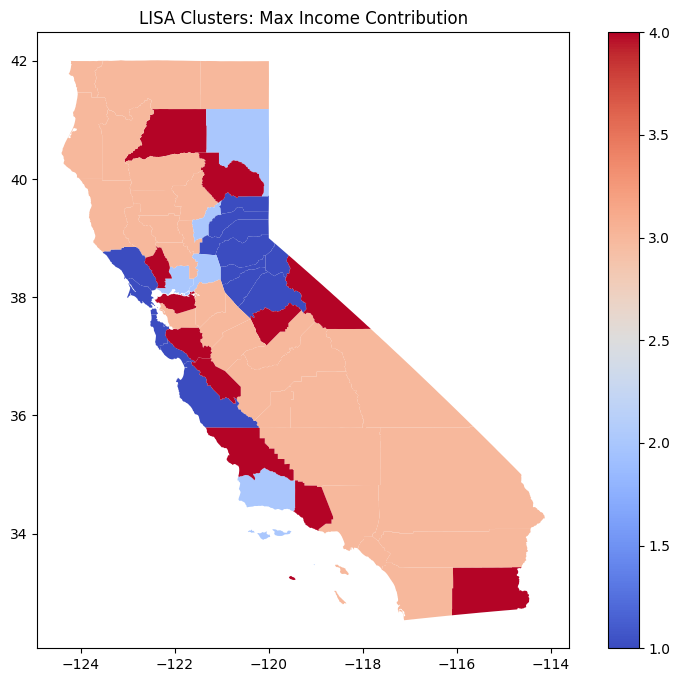

In [85]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_merged.plot(column="lisa_cluster", cmap="coolwarm", legend=True, ax=ax)
plt.title("LISA Clusters: Max Income Contribution")
plt.show()


<Axes: >

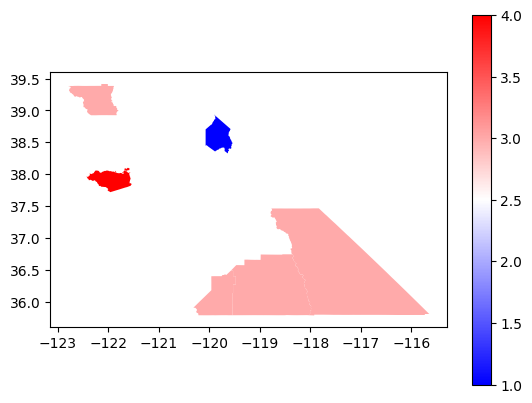

In [86]:
gdf_merged[gdf_merged["lisa_significant"]].plot(column="lisa_cluster", cmap="bwr", legend=True)


In [87]:
from libpysal.weights import Queen
from esda.moran import Moran_Local

w = Queen.from_dataframe(gdf_merged, use_index=False)
y = gdf_merged["max_income_contribution"]
lisa = Moran_Local(y, w)

gdf_merged["lisa_cluster"] = lisa.q        # 1=HH, 2=LL, 3=HL, 4=LH
gdf_merged["lisa_significant"] = lisa.p_sim < 0.05


In [88]:
lisa_labels = {
    1: "High-High",
    2: "Low-Low",
    3: "High-Low",
    4: "Low-High"
}

cluster_colors = {
    "High-High": "darkred",
    "Low-Low": "darkblue",
    "High-Low": "orange",
    "Low-High": "green"
}

# Add label text column
gdf_merged["lisa_label"] = gdf_merged["lisa_cluster"].map(lisa_labels)


In [89]:
import folium
from folium.features import GeoJsonTooltip

# Use previous center logic or hardcode
center = gdf_merged.geometry.centroid.unary_union.centroid
lat, lon = center.y, center.x
m_lisa = folium.Map(location=[lat, lon], zoom_start=6)

# Filter only statistically significant clusters
gdf_lisa_sig = gdf_merged[gdf_merged["lisa_significant"]]

folium.GeoJson(
    gdf_lisa_sig,
    name="LISA Significant Clusters",
    tooltip=GeoJsonTooltip(
        fields=["County_clean", "lisa_label"],
        aliases=["County", "LISA Cluster"],
        sticky=True
    ),
    style_function=lambda feature: {
        "fillColor": cluster_colors.get(feature["properties"]["lisa_label"], "gray"),
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.8
    }
).add_to(m_lisa)

folium.LayerControl().add_to(m_lisa)
m_lisa


C:\Users\Fernando\AppData\Local\Temp\ipykernel_1492\391915762.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = gdf_merged.geometry.centroid.unary_union.centroid
C:\Users\Fernando\AppData\Local\Temp\ipykernel_1492\391915762.py:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  center = gdf_merged.geometry.centroid.unary_union.centroid
